# Analisis de Job Shift
* En base a dataset de Kagle

### Importar Librerias

In [20]:
import pandas as pd
import seaborn as sns

## 0 Entender el caso de negocio
* Analizando los factores que ayudan a hacer el cambio a un puesto de HR analytics
1. Employee_1D: codigo unico del empleado
2. city: ciudad ficticia, no exite mas información de la ciudad como tamaño o nivel de ingresos
3. gender: Femenino, masculino, otro (contiene nulls)
4. HR Analytics: Experiencia en HR analytics (tiene o no tiene)
5. University Grade: grado universitario, Grade 1 es el max
6. education_level: Nivel educativo (contiene nulls)
7. Has HR expereince: Tiene o no tiene experiencia en HR
8. experience: años de experiencia (contiene nulls)
9. Job changes: cambios de trabajo por candidato (contiene nulls)
10. Training hours: Horas de entrenamiento del candiato (80% aprox null)
11. company_size: Nro empleados en la empresa donde trabaja (contiene nulls)
12. Get HR Analytics Job? : Obtendra o no un trabajo de HR analytics

#### Objetivo: va ser encontrar qué es lo que influye en que un candidatos pueda obtener un empleo como HR analytics


## 1 Extraer data y forma

In [3]:
#extraigo la base desde un csv
df = pd.read_csv('HR analytics.csv')

In [6]:
# conociendo la forma del df
# 2129 registros y 12 columnas
df.shape

(2129, 12)

In [7]:
# Revisando las columnas que tiene
df.columns

Index(['Employee_1D', 'city', 'gender', 'HR Analytics', 'University Grade',
       'education_level', 'Has HR expereince', 'experience', 'Job changes',
       'Training hours', 'company_size', 'Get HR Analytics Job? '],
      dtype='object')

In [8]:
# Revisnaod el tipo de dato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Employee_1D             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   gender                  1621 non-null   object 
 3   HR Analytics            2129 non-null   object 
 4   University Grade        2129 non-null   object 
 5   education_level         2077 non-null   object 
 6   Has HR expereince       2129 non-null   object 
 7   experience              2124 non-null   object 
 8   Job changes             2089 non-null   object 
 9   Training hours          29 non-null     float64
 10  company_size            1507 non-null   object 
 11  Get HR Analytics Job?   2129 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 199.7+ KB


In [19]:
# check unique values by colum
print('valores genero', df['gender'].unique())
print('valores HR Analytics', df['HR Analytics'].unique())
print('valores University Grade', df['University Grade'].unique())
print('valores education_level', df['education_level'].unique())
print('valores experience', df['experience'].unique())
print('valores Job changes', df['Job changes'].unique())
print('valores Training hours', df['Training hours'].unique())
print('valores company_size', df['company_size'].unique())


valores genero ['Male' 'Female' nan 'Other']
valores HR Analytics ['Has relevent experience' 'No relevent experience']
valores University Grade ['Grade 2' 'Grade 3' 'Grade 1']
valores education_level ['Graduate' 'High School' 'Masters' nan 'Phd' 'Primary School']
valores experience ['9' '5' '<1' '11' '>20' '10' '14' '3' '20' '8' '4' '13' '2' '6' '7' '1'
 '19' '15' '16' nan '17' '18' '12']
valores Job changes ['1' 'never' '>4' '2' '4' '3' nan]
valores Training hours [ 98.   8.  86.  69.  97.  51. 114.  67. 105.   1.   0. 109.  79. 148.
   5. 121.  39.  23. 120.  90.  82. 135.  59. 150.  70.  21.  10.  99.
  89.  nan]
valores company_size ['<10' nan '1-10' '10000+' '100-500' '50-99' '1000-4999' '500-999'
 '5000-9999']


## 2 Analizando Datos faltantes

* En que columnas tengo faltantes
    * gender (Podria reemplazarlo con la moda, pero es necesario ver si esto afecta a la pregunta final)
    * Education Level (Podria enlazarlo con  univerity grade) 
    * Expercience (solo 5 nan no afectaria mucho)
    * Job changes (podria enlazarlo con la experiencia)
    * Trainning hous (demasiados nan, puede que no ayude esta variable) 98%
    * Company size (28% sde datos faltantes)

In [20]:
df.isnull().sum()

Employee_1D                  0
city                         0
gender                     508
HR Analytics                 0
University Grade             0
education_level             52
Has HR expereince            0
experience                   5
Job changes                 40
Training hours            2100
company_size               622
Get HR Analytics Job?        0
dtype: int64

## 3 Analizar las relaciones quitando los datos faltantes
* Analizar las relacion eliminando todoos los NaN como una primera vista, esto me ayudara a ver la realcion de la variables y con eso poder generar sustituciones
* no voy a tomar en cuenta los faltantes de Trainin hours ya que son el 98%

In [118]:
df_sin_na = df.loc[:,df.columns != 'Training hours'].dropna()

In [119]:
df_sin_na.isnull().sum()

Employee_1D               0
city                      0
gender                    0
HR Analytics              0
University Grade          0
education_level           0
Has HR expereince         0
experience                0
Job changes               0
company_size              0
Get HR Analytics Job?     0
dtype: int64

* Tranformar los datos cuantitativos a numeros

In [120]:
#extraigo todos los valores numericos de city
df_sin_na['city'] = df_sin_na['city'].str[5:]
df_sin_na['city'] = pd.to_numeric(df_sin_na['city'])

In [121]:
# Tranformo a numericos gender
df_sin_na.loc[df_sin_na['gender']=='Male', 'gender'] = 1
df_sin_na.loc[df_sin_na['gender']=='Female', 'gender'] = 2
df_sin_na.loc[df_sin_na['gender']=='Other', 'gender'] = 0
df_sin_na['gender'] = pd.to_numeric(df_sin_na['gender'])

In [122]:
df_sin_na.loc[df_sin_na['HR Analytics']=='Has relevent experience', 'HR Analytics'] = 1
df_sin_na.loc[df_sin_na['HR Analytics']=='No relevent experience', 'HR Analytics'] = 0
df_sin_na['HR Analytics'] = pd.to_numeric(df_sin_na['HR Analytics'])

In [123]:
df_sin_na['University Grade'] = df_sin_na['University Grade'].str[6:]
df_sin_na['University Grade'] = pd.to_numeric(df_sin_na['University Grade'])

In [124]:
df_sin_na.loc[df_sin_na['education_level']=='Primary School', 'education_level'] = 1
df_sin_na.loc[df_sin_na['education_level']=='High School', 'education_level'] = 2
df_sin_na.loc[df_sin_na['education_level']=='Graduate', 'education_level'] = 3
df_sin_na.loc[df_sin_na['education_level']=='Masters', 'education_level'] = 4
df_sin_na.loc[df_sin_na['education_level']=='Phd', 'education_level'] = 5
df_sin_na['education_level'] = pd.to_numeric(df_sin_na['education_level'])

In [125]:
df_sin_na.loc[df_sin_na['Has HR expereince']=='Yes', 'Has HR expereince'] = 1
df_sin_na.loc[df_sin_na['Has HR expereince']=='No', 'Has HR expereince'] = 0
df_sin_na['Has HR expereince'] = pd.to_numeric(df_sin_na['Has HR expereince'])

In [126]:
df_sin_na.loc[df_sin_na['experience']=='>20', 'experience'] = 25
df_sin_na.loc[df_sin_na['experience']=='<1', 'experience'] = 0.6
df_sin_na['experience'] = pd.to_numeric(df_sin_na['experience'])

In [127]:
df_sin_na.loc[df_sin_na['Job changes']=='>4', 'Job changes'] = 5
df_sin_na.loc[df_sin_na['Job changes']=='never', 'Job changes'] = 0
df_sin_na['Job changes'] = pd.to_numeric(df_sin_na['Job changes'])

In [128]:
df_sin_na.loc[df_sin_na['company_size']=='1-10', 'company_size'] = 1
df_sin_na.loc[df_sin_na['company_size']=='<10', 'company_size'] = 2
df_sin_na.loc[df_sin_na['company_size']=='50-99', 'company_size'] = 3
df_sin_na.loc[df_sin_na['company_size']=='100-500', 'company_size'] = 4
df_sin_na.loc[df_sin_na['company_size']=='500-999', 'company_size'] = 5
df_sin_na.loc[df_sin_na['company_size']=='1000-4999', 'company_size'] = 6
df_sin_na.loc[df_sin_na['company_size']=='5000-9999', 'company_size'] = 7
df_sin_na.loc[df_sin_na['company_size']=='10000+', 'company_size'] = 8
df_sin_na['company_size'] = pd.to_numeric(df_sin_na['company_size'])

In [129]:
df_sin_na.loc[df_sin_na['Get HR Analytics Job? ']=='Yes', 'Get HR Analytics Job? '] = 1
df_sin_na.loc[df_sin_na['Get HR Analytics Job? ']=='No', 'Get HR Analytics Job? '] = 0
df_sin_na['Get HR Analytics Job? '] = pd.to_numeric(df_sin_na['Get HR Analytics Job? '])

In [130]:
df_sin_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 2128
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Employee_1D             1179 non-null   int64  
 1   city                    1179 non-null   int64  
 2   gender                  1179 non-null   int64  
 3   HR Analytics            1179 non-null   int64  
 4   University Grade        1179 non-null   int64  
 5   education_level         1179 non-null   int64  
 6   Has HR expereince       1179 non-null   int64  
 7   experience              1179 non-null   float64
 8   Job changes             1179 non-null   int64  
 9   company_size            1179 non-null   int64  
 10  Get HR Analytics Job?   1179 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 110.5 KB


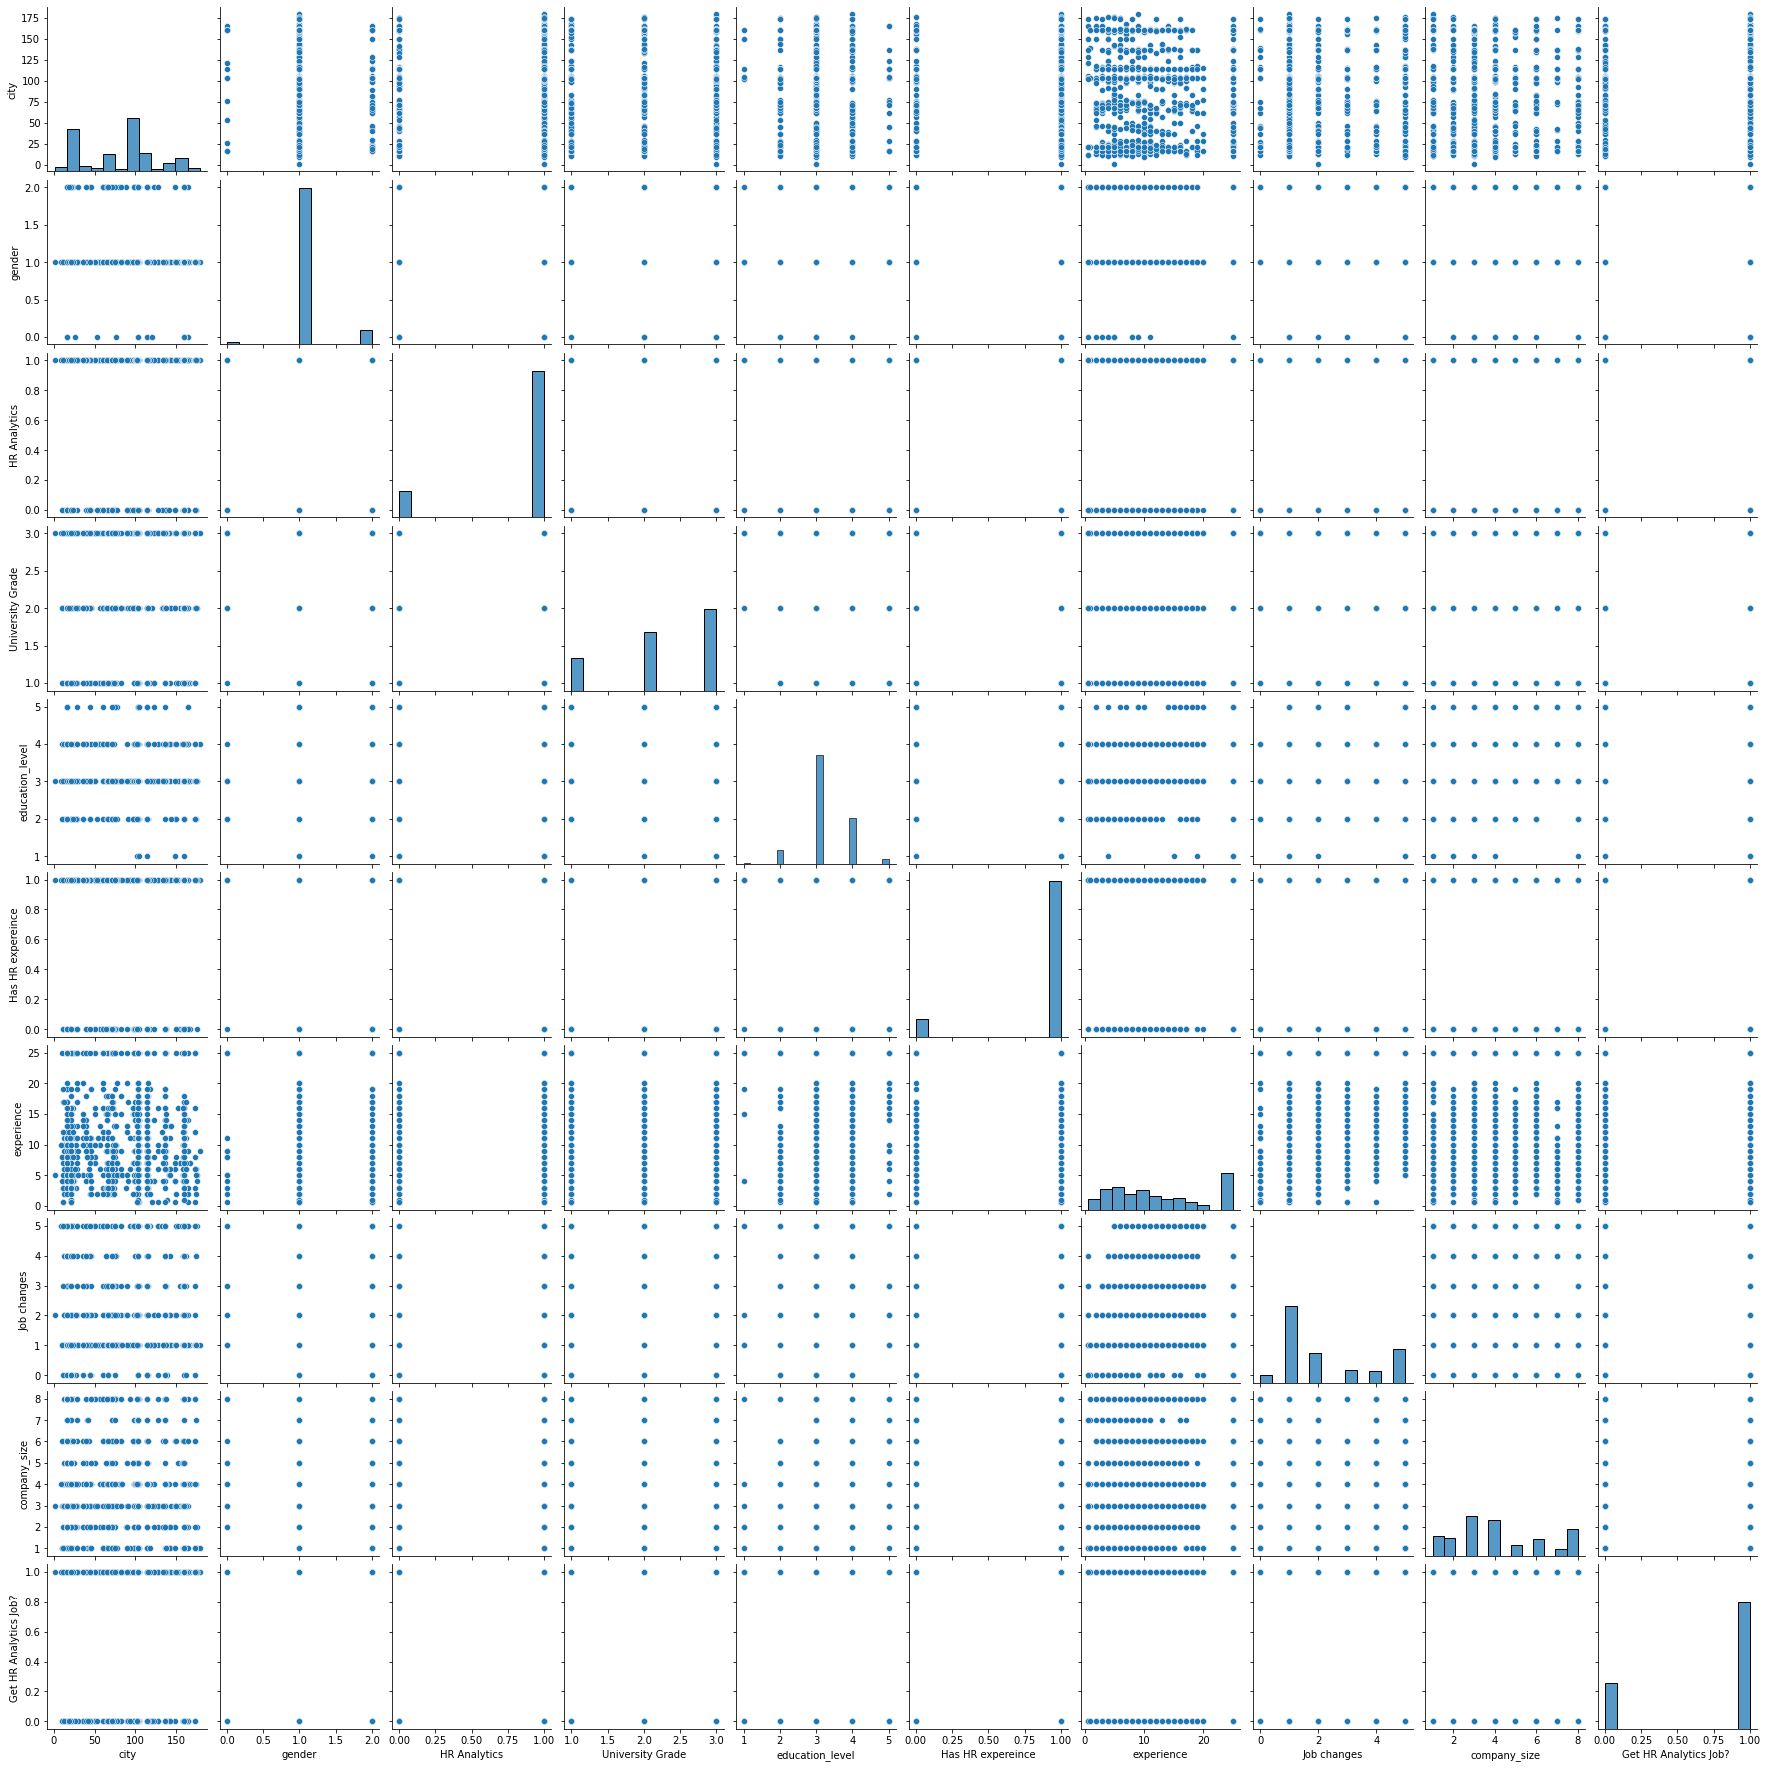

In [131]:
sns.pairplot(df_sin_na.loc[:,df_sin_na.columns != 'Employee_1D'])

### Entendiendo Gender para analizar los faltantes

* El gender esta desbalanceado por tener casi el 70% de valores mal
* Se tendria que analizar mas adelante si es que esta variable influye en el resultado

In [4]:
df.groupby(by=['gender'], as_index=False).agg(n = ('Employee_1D', 'count')).sort_values(by='n', ascending = False)#.n / 2129

,gender,n
1,Male,1460
0,Female,137
2,Other,24


### Entendiendo Experience

In [13]:
df.groupby(by=['experience'], as_index=False).agg(n = ('Employee_1D', 'count')).sort_values(by='n', ascending = False)#.n / 2129

,experience,n
21,>20,383
15,5,163
13,3,154
14,4,145
16,6,130
11,2,128
17,7,116
19,9,113
1,10,96
2,11,86


### Entendiendo Education Level

* Todos los niveles de educacion tiene univ grade, en este caso voy a asumir que son grados dentro del nivel educativo

In [12]:
df.groupby(by=['education_level'], as_index=False).agg(exp = ('Employee_1D', 'count'))

,education_level,experience,n
0,Graduate,1,32
1,Graduate,10,59
2,Graduate,11,46
3,Graduate,12,35
4,Graduate,13,39
...,...,...,...
89,Primary School,5,2
90,Primary School,6,3
91,Primary School,7,2
92,Primary School,<1,1


In [11]:
df[df['education_level'].isnull()==True]

,Employee_1D,city,gender,HR Analytics,University Grade,education_level,Has HR expereince,experience,Job changes,Training hours,company_size,Get HR Analytics Job?
19,103172,city_21,Male,No relevent experience,Grade 3,NaN,Yes,2,never,90.0,NaN,Yes
32,103881,city_116,NaN,Has relevent experience,Grade 3,NaN,Yes,NaN,never,NaN,50-99,Yes
53,104905,city_149,NaN,No relevent experience,Grade 1,NaN,Yes,2,NaN,NaN,NaN,No
57,105150,city_76,Male,Has relevent experience,Grade 2,NaN,Yes,7,>4,NaN,100-500,Yes
86,106370,city_75,Male,Has relevent experience,Grade 3,NaN,Yes,19,>4,NaN,1-10,No
125,108372,city_103,NaN,No relevent experience,Grade 3,NaN,No,NaN,NaN,NaN,NaN,Yes
200,111831,city_21,NaN,No relevent experience,Grade 3,NaN,Yes,1,never,NaN,NaN,Yes
215,112642,city_30,Male,Has relevent experience,Grade 2,NaN,Yes,>20,NaN,NaN,<10,Yes
222,112960,city_160,Male,Has relevent experience,Grade 1,NaN,Yes,>20,2,NaN,<10,No
242,113908,city_114,Male,Has relevent experience,Grade 3,NaN,No,2,never,NaN,NaN,Yes
